In [110]:
import keras
from keras import layers
import visualkeras
from PIL import ImageFont
from collections import defaultdict

In [202]:
input_imag = keras.Input(shape = (64,64,64,1))

x = layers.Conv3D(32, (3,3,3), activation='elu', padding='same')(input_imag)
x=layers.BatchNormalization()(x)
x = layers.MaxPooling3D((2,2,2),strides=(2, 2, 2))(x)
x = layers.Conv3D(64, (3,3,3), activation='elu', padding='same')(x)
x=layers.BatchNormalization()(x)
encoded = layers.MaxPooling3D((2,2,2),strides=(2, 2, 2), name='encoder')(x)

x = layers.Conv3DTranspose(64,(2,2,2), activation='elu')(x)
x=layers.BatchNormalization()(x)
x = layers.Conv3DTranspose(32, (2,2,2),strides=(2, 2, 2),activation='elu')(x)
decoded=layers.BatchNormalization()(x)


autoencoder = keras.Model(input_imag, [decoded])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [203]:
autoencoder.summary()

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 64, 64, 64, 1)]   0         
                                                                 
 conv3d_97 (Conv3D)          (None, 64, 64, 64, 32)    896       
                                                                 
 batch_normalization_110 (Ba  (None, 64, 64, 64, 32)   128       
 tchNormalization)                                               
                                                                 
 max_pooling3d_30 (MaxPoolin  (None, 32, 32, 32, 32)   0         
 g3D)                                                            
                                                                 
 conv3d_98 (Conv3D)          (None, 32, 32, 32, 64)    55360     
                                                                 
 batch_normalization_111 (Ba  (None, 32, 32, 32, 64)   256

In [211]:
font = ImageFont.truetype("times new roman.ttf", 17)

In [212]:
color_map = defaultdict(dict)
color_map[layers.Conv3D]['fill'] = 'orange'
color_map[layers.BatchNormalization]['fill'] = 'gray'
color_map[layers.UpSampling3D]['fill'] = 'red'


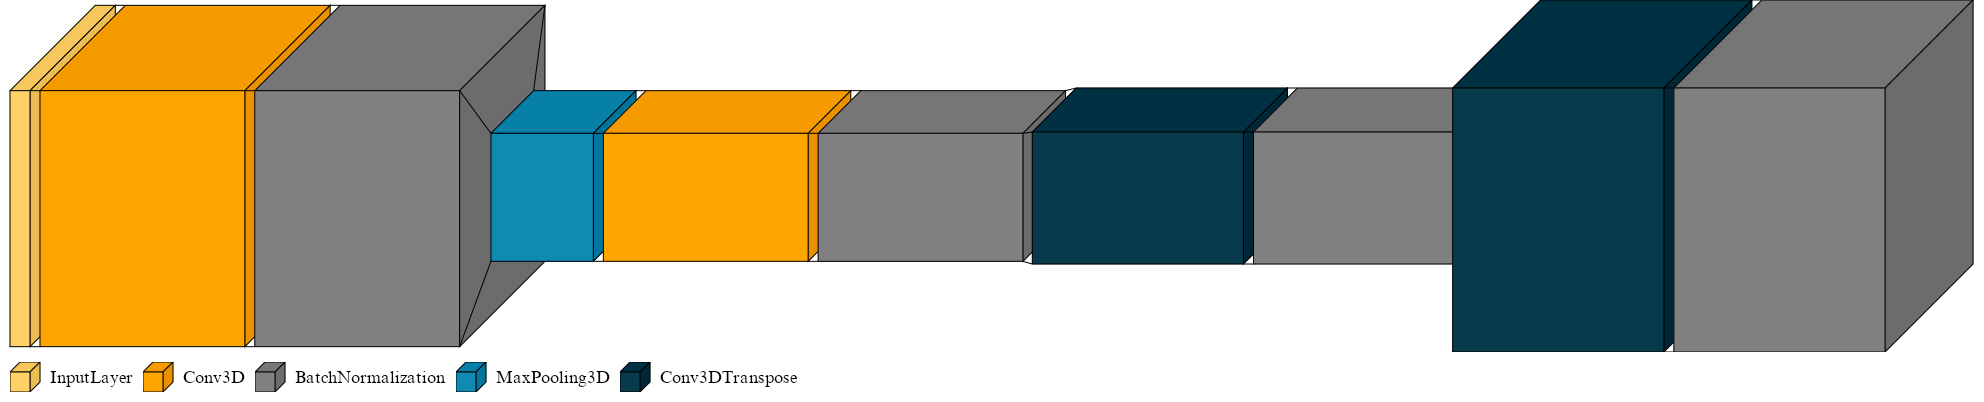

In [213]:
visualkeras.layered_view(autoencoder, legend=True,min_xy=7, font =font,color_map=color_map)

In [207]:
?layers.Conv3D

In [ ]:
class EEGAutoencoder(nn.Module):
    def __init__(self):
        super(EEGAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv3d(1, 16, 3, stride=1, padding=1),
            nn.BatchNorm3d(16),
            nn.ELU(True),
            nn.Conv3d(16, 16, 3, stride=1, padding=1),
            nn.BatchNorm3d(16),
            nn.ELU(True),
            nn.Dropout3d(p=0.2),
            nn.MaxPool3d(2, stride=2),  # b, 16, 5, 5
            nn.Conv3d(16, 8, 3, stride=1, padding=1),  # b, 8, 3, 3
            nn.BatchNorm3d(8),
            nn.ELU(True),
            nn.MaxPool3d(2, stride=2), 
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(8, 16, 2, stride=2),  # b, 16, 5, 5
            nn.ELU(True),
            nn.BatchNorm3d(16),
            nn.ConvTranspose3d(16, 16, 2, stride=2),  # b, 16, 5, 5
            nn.ELU(True),
            nn.BatchNorm3d(16),
            nn.ConvTranspose3d(16, 1, 2, stride=2),  # b, 8, 15, 15
            nn.BatchNorm3d(1),
            nn.ELU(True)
        )
        self.pool =nn.AdaptiveAvgPool3d((8,8,8))
        self.fc = nn.Linear(8*8*64, 2)